In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from data_structs import NewsDataLoader, EvaluationDataLoader, ScorePackage
from utils import model_predict, model_evaluate, model_predict_evaluate

#importing the data
news = pd.read_csv('../dataset_processed/fakeNews_titleStemming_Sampled.csv', index_col=0)
news.reset_index(inplace=True)

from sklearn.model_selection import train_test_split
train_news, test_news = train_test_split(news, test_size=0.2, 
                                         random_state=7)

train_news_predictors_rnn = train_news['title']
train_news_predictors = train_news.drop(columns = ['title', 'label'])
train_news_target = train_news['label']
train_news_loader = NewsDataLoader(train_news_predictors, train_news_target)
train_news_loader_rnn = NewsDataLoader(train_news_predictors_rnn, train_news_target)

test_news_predictors_rnn = test_news['title']
test_news_predictors = test_news.drop(columns = ['title', 'label'])
test_news_target = test_news['label']
test_news_loader = NewsDataLoader(test_news_predictors, test_news_target)
test_news_loader_rnn = NewsDataLoader(test_news_predictors_rnn, test_news_target)

In [2]:
from sklearn.linear_model import LogisticRegression

model_logisticRegression = LogisticRegression(solver='liblinear', random_state=0)
model_logisticRegression.fit(
    train_news_loader.predictors, train_news_loader.target)

LogisticRegression(random_state=0, solver='liblinear')

For <logisticRegression> evaluated on <train> Dataset:
    - accuracy: 0.995
    - precisionn: 0.988
    - recall: 1.0
    - f1 score: 0.995
For <logisticRegression> evaluated on <test> Dataset:
    - accuracy: 0.905
    - precisionn: 0.965
    - recall: 0.838
    - f1 score: 0.904


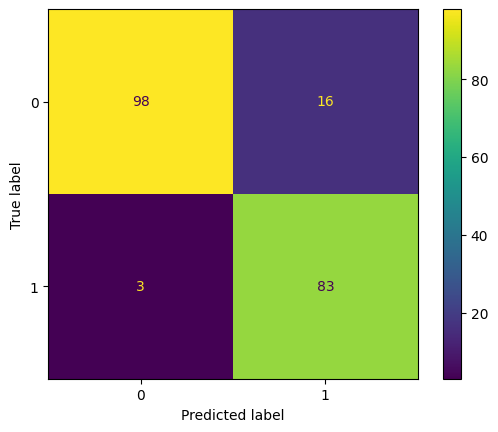

In [3]:
score_package_train_logisticRegression, score_package_test_logisticRegression = model_predict_evaluate(
        model=model_logisticRegression, 
        name_model='logisticRegression', 
        train_news_loader=train_news_loader,
        test_news_loader=test_news_loader
)

In [5]:
from sklearn.linear_model import LogisticRegressionCV

## Set up seq of c-values
c_vals = [0.1, 1]

## Initialize
cv_elastic_lr = LogisticRegressionCV(cv=10, Cs = c_vals, 
                                     l1_ratios = [0.1,0.5], penalty="elasticnet", 
                                     solver="saga", tol=1e-4, max_iter = 1000, scoring = "f1")

## Fit
cv_elastic_lr.fit(train_news_loader.predictors, 
                  train_news_loader.target)

## Print the best value of C
print(cv_elastic_lr.C_)

## Print the best l1_ratio
print(cv_elastic_lr.l1_ratio_)

[1.]
[0.1]


In [14]:
model_logisticRegression = LogisticRegression(C = 1, l1_ratio = 0.1, 
                                              penalty="elasticnet", 
                                              solver="saga", tol=1e-4, 
                                              max_iter = 1000)
model_logisticRegression.fit(
    train_news_loader.predictors, train_news_loader.target)

LogisticRegression(C=1, l1_ratio=0.1, max_iter=1000, penalty='elasticnet',
                   solver='saga')

For <logisticRegression> evaluated on <train> Dataset:
    - accuracy: 0.788
    - precisionn: 0.598
    - recall: 0.847
    - f1 score: 0.768
For <logisticRegression> evaluated on <test> Dataset:
    - accuracy: 0.73
    - precisionn: 0.488
    - recall: 0.808
    - f1 score: 0.701


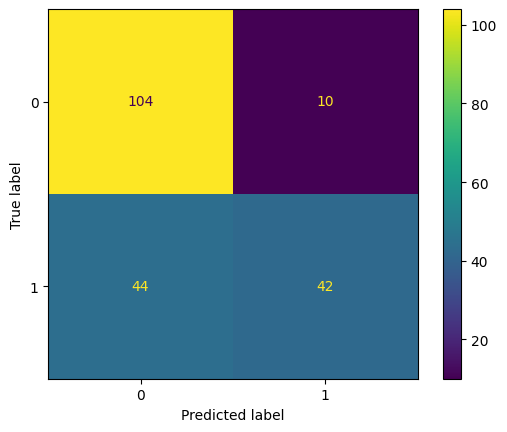

In [15]:
score_package_train_logisticRegression, score_package_test_logisticRegression = model_predict_evaluate(
        model=model_logisticRegression, 
        name_model='logisticRegression', 
        train_news_loader=train_news_loader,
        test_news_loader=test_news_loader
)